# **Tame Your Python**

Reference: https://pythonmachinelearning.pro/


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

In [0]:
# Load data
dataset = fetch_lfw_people(min_faces_per_person=100)
 
N, H, W = dataset.images.shape
X = dataset.data
y = dataset.target
target_names = dataset.target_names

In [25]:
print(target_names)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


In [13]:
print(dataset.images.shape)
print(dataset.data.shape)
print(dataset.target.shape)

(1140, 62, 47)
(1140, 2914)
(1140,)


In [14]:
print(H*W)

2914


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [0]:
from sklearn.decomposition import PCA
n_components = 80
pca = PCA(n_components=n_components, whiten=True).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [17]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier (hidden_layer_sizes=(1024,), batch_size=256, verbose=True, early_stopping=True)
model.fit(X_train_pca, y_train)

Iteration 1, loss = 1.49107240
Validation score: 0.572816
Iteration 2, loss = 1.05745528
Validation score: 0.572816
Iteration 3, loss = 0.82899522
Validation score: 0.640777
Iteration 4, loss = 0.64319236
Validation score: 0.776699
Iteration 5, loss = 0.50558015
Validation score: 0.815534
Iteration 6, loss = 0.40475474
Validation score: 0.844660
Iteration 7, loss = 0.33180780
Validation score: 0.844660
Iteration 8, loss = 0.27605145
Validation score: 0.844660
Iteration 9, loss = 0.23196116
Validation score: 0.854369
Iteration 10, loss = 0.19663698
Validation score: 0.864078
Iteration 11, loss = 0.16817250
Validation score: 0.873786
Iteration 12, loss = 0.14463950
Validation score: 0.873786
Iteration 13, loss = 0.12668255
Validation score: 0.883495
Iteration 14, loss = 0.11061654
Validation score: 0.883495
Iteration 15, loss = 0.09785022
Validation score: 0.873786
Iteration 16, loss = 0.08691335
Validation score: 0.864078
Iteration 17, loss = 0.07726101
Validation score: 0.854369
Iterat

MLPClassifier(activation='relu', alpha=0.0001, batch_size=256, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(1024,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [0]:
y_pred = model.predict(X_test_pca)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.82      0.95      0.88        19
  Donald Rumsfeld       0.88      0.64      0.74        11
    George W Bush       0.91      1.00      0.95        53
Gerhard Schroeder       0.92      0.86      0.89        14
       Tony Blair       0.92      0.71      0.80        17

         accuracy                           0.89       114
        macro avg       0.89      0.83      0.85       114
     weighted avg       0.90      0.89      0.89       114



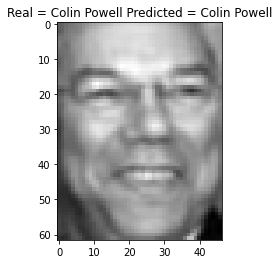

In [36]:
idx = np.random.randint(0,len(y_pred))
plt.figure()
plt.imshow(X_test[idx].reshape((H,W)), cmap = 'gray')
plt.title("Real = " + str(target_names[y_test[idx]]) + " Predicted = " + str(target_names[y_pred[idx]]))
plt.show()

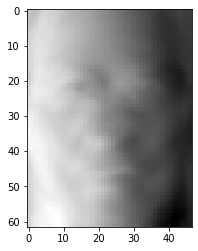

In [45]:
idx = 1
plt.figure()
plt.imshow(pca.components_[idx].reshape((H,W)), cmap = 'gray')
plt.show()

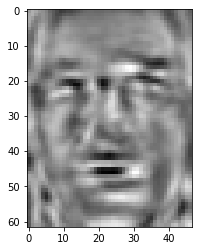

In [44]:
idx = 79
plt.figure()
plt.imshow(pca.components_[idx].reshape((H,W)), cmap = 'gray')
plt.show()